Nota generada a partir de [liga](https://www.dropbox.com/s/qb3swgkpaps7yba/4.1.Introduccion_optimizacion_convexa.pdf?dl=0), [liga2](https://www.dropbox.com/s/6isby5h1e5f2yzs/4.2.Problemas_de_optimizacion_convexa.pdf?dl=0), [liga3](https://www.dropbox.com/s/ko86cce1olbtsbk/4.3.1.Teoria_de_convexidad_Conjuntos_convexos.pdf?dl=0), [liga4](https://www.dropbox.com/s/mmd1uzvwhdwsyiu/4.3.2.Teoria_de_convexidad_Funciones_convexas.pdf?dl=0).

# Optimización numérica y machine learning

**Optimización de código ¿es optimización numérica?**

Hasta este módulo hemos invertido buena parte del tiempo del curso en la eficiente implementación en el hardware que poseemos. Revisamos lo que estudia el análisis numérico o cómputo científico, definiciones de sistema de punto flotante, funciones, derivadas, integrales y métodos o algoritmos numéricos para su aproximación. Consideramos *bottlenecks* que pueden surgir en la implementación de los métodos o algoritmos y revisamos posibles opciones para encontrarlos y minimizarlos (**optimización de código**). Lo anterior lo resumimos con el uso de herramientas como: perfilamiento, integración de R y Python con C++ o C, cómputo en paralelo y uso del caché de forma eficiente al usar niveles altos en operaciones de BLAS ([módulo I: cómputo científico y análisis numérico](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/I.computo_cientifico), [módulo II: cómputo en paralelo](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/tree/master/temas/II.computo_paralelo), [módulo III: cómputo matricial](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/tree/master/temas/III.computo_matricial)). 

La **optimización numérica** no es optimización de código sin embargo se apoya enormemente de ella para la implementación de sus métodos o algoritmos en la(s) máquina(s) para resolver problemas que surgen en tal rama de las **matemáticas aplicadas**. A la implementación y simulación en el desarrollo de los métodos o algoritmos del análisis numérico o cómputo científico típicamente se le acompaña de estudios que realizan [benchmarks](https://en.wikipedia.org/wiki/Benchmark_(computing)) y perfilamiento (mediciones de tiempo y memoria, por ejemplo) con el objetivo de tener **software confiable y eficiente** en la práctica. Esto lo encontramos también en la rama de optimización numérica con los métodos o algoritmos que son desarrollados e implementados.

**Métodos o algoritmos numéricos en *big data***

La implementación de los métodos o algoritmos en el contexto de **grandes cantidades de datos** o *big data* es **crítica** al ir a la práctica pues de esto depende que nuestra(s) máquina(s) tarde meses, semanas, días u horas para resolver problemas que se presentan en este contexto. La ciencia de datos apunta al desarrollo de técnicas y se apoya de aplicaciones de *machine learning* para la extracción de conocimiento útil y toma como fuente de información las grandes cantidades de datos. 

## ¿Problemas de optimización numérica?

Una gran cantidad de aplicaciones plantean problemas de optimización. Tenemos problemas básicos que se presentan en cursos iniciales de cálculo:

*Una caja con base y tapa cuadradas debe tener un volumen de $100 cm^3$. Encuentre las dimensiones de la caja que minimicen la cantidad de material.*

Y tenemos más especializados que encontramos en áreas como estadística, ingeniería, finanzas o *machine learning*:

* Ajustar un modelo de regresión lineal a un conjunto de datos.

* Buscar la mejor forma de invertir un capital en un conjunto de activos.

* Elección del ancho y largo de un dispositivo en un circuito electrónico.

* Ajustar un modelo que clasifique un conjunto de datos.

En general un problema de optimización matemática o numérica tiene la forma:

$$\displaystyle \min_{x \in \mathbb{R}^n} f_o(x)$$

$$\text{sujeto a:} f_i(x) \leq b_i, i=1,\dots, m$$

donde: $x=(x_1,x_2,\dots, x_n)^T$ es la **variable de optimización del problema**, la función $f_o: \mathbb{R}^{n} \rightarrow \mathbb{R}$ es la **función objetivo**, las funciones $f_i: \mathbb{R}^n \rightarrow \mathbb{R}, i=1,\dots,m$ son las **funciones de restricción** (aquí se colocan únicamente desigualdades pero pueden ser sólo igualdades o bien una combinación de ellas) y las constantes $b_1,b_2,\dots, b_m$ son los **límites o cotas de las restricciones**. 

Un vector $x^* \in \mathbb{R}^n$ es nombrado **óptimo** o solución del problema anterior si tiene el valor más pequeño de entre todos los vectores $x \in \mathbb{R}^n$ que satisfacen las restricciones. Por ejemplo, si $z \in \mathbb{R}^n$ satisface $f_1(z) \leq b_1, f_2(z) \leq b_2, \dots, f_m(z) \leq b_m$ y $x^*$ es óptimo entonces $f_o(z) \geq f_o(x^*)$.

**Comentarios:** 

* En el módulo IV del curso revisaremos métodos o algoritmos de optimización para funciones objetivo $f_o: \mathbb{R}^n \rightarrow \mathbb{R}$. Sin embargo, hay formulaciones que utilizan $f_o: \mathbb{R}^n \rightarrow \mathbb{R}^q$. Tales formulaciones pueden hallarlas en la optimización multicriterio, multiobjetivo, vectorial o también nombrada Pareto, ver [Multi objective optimization](https://en.wikipedia.org/wiki/Multi-objective_optimization).

* Obsérvese que el problema de optimización definido utiliza una forma de minimización y no de maximización. Típicamente en la literatura por convención se consideran problemas de este tipo. Además minimizar $f_o$ y maximizar $-f_o$ son **problemas de optimización equivalentes**\*.

\*A grandes rasgos dos problemas de optimización son equivalentes si con la solución de uno de ellos se obtiene la solución del otro y viceversa.

**Ejemplo:**

1) $$\displaystyle \min_{x \in \mathbb{R}^n} ||x||_2$$

$$\text{sujeto a:} Ax \leq b$$


con $A \in \mathbb{R}^{m \times n}, b \in \mathbb{R}^m$. En este problema buscamos el vector $x$ que es solución del problema $Ax \leq b$ con mínima norma Euclidiana. La función objetivo es $f_o(x)=||x||_2$, las funciones de restricción son las desigualdades lineales $f_i(x) = a_i^Tx \leq b_i$ con $a_i$ $i$-ésimo renglón de $A$ y $b_i$ $i$-ésima componente de $b$, $\forall i=1,\dots,m$.

**Comentario:** un problema similar al anterior lo podemos encontrar en resolver el sistema de ecuaciones lineales $Ax=b$ *underdetermined* en el que $m < n$ y se busca el vector $x$ con mínima norma Euclidiana que satisfaga tal sistema. Tal sistema puede tener infinitas soluciones o ninguna solución, ver [3.3.Solucion_de_SEL_y_FM](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/III.computo_matricial/3.3.Solucion_de_SEL_y_FM.ipynb).

2) Encuentra el punto en la gráfica de $y=x^2$ que es más cercano al punto $P=(1,0)$ bajo la norma Euclidiana.

Deseamos minimizar la cantidad $||(1,0)-(x,y)||_2$. Además $y = y(x)$ por lo que reescribiendo lo anterior se tiene $||(1,0)-(x,x^2)||_2=||(1-x,-x^2)||_2=\sqrt{(1-x)^2+x^4}$. Entonces el problema de optimización (sin restricciones) es:

$$\displaystyle \min_{x \in \mathbb{R}}\sqrt{(1-x)^2+x^4}$$

## ¿Machine learning, statistical machine learning y optimización numérica?

En esta sección relacionamos a *machine learning* con la optimización y se describen diferentes enfoques que se han propuesto para aplicaciones de *machine learning* con métodos de optimización. Lo siguiente **no** pretende ser una exposición extensa **ni** completa sobre *machine learning*, ustedes llevan materias que se enfocan esencialmente a definir esta área, sus objetivos y conceptos más importantes. 

En la ciencia de datos se utilizan las aplicaciones desarrolladas en *machine learning* por ejemplo:

* Clasificación de documentos o textos: detección de *spam*.

* [Procesamiento de lenguaje natural](https://en.wikipedia.org/wiki/Natural_language_processing):  [named-entity recognition](https://en.wikipedia.org/wiki/Named-entity_recognition).

* [Reconocimiento de voz](https://en.wikipedia.org/wiki/Speech_recognition).

* [Visión por computadora](https://en.wikipedia.org/wiki/Computer_vision): reconocimiento de rostros o imágenes.

* Detección de fraude.

* [Reconocimiento de patrones](https://en.wikipedia.org/wiki/Pattern_recognition).

* Diagnóstico médico.

* [Sistemas de recomendación](https://en.wikipedia.org/wiki/Recommender_system).


Las aplicaciones anteriores involucran problemas como son:

* Clasificación.

* Regresión.

* *Ranking*.

* *Clustering*.

* Reducción de la dimensionalidad.

En cada una de las aplicaciones o problemas anteriores se utilizan **funciones de pérdida** que guían el proceso de aprendizaje. Tal proceso involucra **optimización parámetros** de la función de pérdida. Por ejemplo, si la función de pérdida en un problema de regresión es una pérdida cuadrática $\mathcal{L}(y,\hat{y}) = (\hat{y}-y)^2$ con $\hat{y} = \hat{\beta}_0 + \beta_1x$, entonces el vector de parámetros a optimizar (aprender) es $
\beta=
\left[ \begin{array}{c}
\beta_0\\
\beta_1
\end{array}
\right]
$.

*Machine learning* no sólo se apoya de la optimización pues es un área de Inteligencia Artificial\* que utiliza técnicas estadísticas para el diseño de sistemas capaces de aplicaciones como las escritas anteriormente, de modo que hoy en día tenemos *statistical machine learning*. No obstante, uno de los **pilares** de *machine learning* o *statistical machine learning* es la optimización.

\*La IA o inteligencia artificial es una rama de las ciencias de la computación que atrajo un gran interés en $1950$.

*Machine learning* o *statistical machine learning* se apoya de las formulaciones y algoritmos en optimización. Sin embargo, también ha contribuido a ésta área desarrollando nuevos enfoques en los métodos o algoritmos para el tratamiento de grandes cantidades de datos o *big data* y estableciendo retos significativos no presentes en problemas clásicos de optimización. De hecho, al revisar literatura que intersecta estas dos disciplinas encontramos comunidades científicas que desarrollan o utilizan métodos o algoritmos exactos (ver [Exact algorithm](https://en.wikipedia.org/wiki/Exact_algorithm)) y otras que utilizan métodos de optimización estocástica (ver [Stochastic optimization](https://en.wikipedia.org/wiki/Stochastic_optimization) y [Stochastic approximation](https://en.wikipedia.org/wiki/Stochastic_approximation)) basados en métodos o algoritmos aproximados (ver [Approximation algorithm](https://en.wikipedia.org/wiki/Approximation_algorithm)). Hoy en día es común encontrar estudios que hacen referencia a **modelos o métodos de aprendizaje**.

Como ejemplo de lo anterior considérese la técnica de **regularización** que en *machine learning* se utiliza para encontrar soluciones que generalicen y provean una explicación no compleja del fenómeno en estudio. La regularización sigue el principio de la navaja de Occam, ver [Occam's razor](https://en.wikipedia.org/wiki/Occam%27s_razor): para cualquier conjunto de observaciones en general se prefieren explicaciones simples a explicaciones más complicadas. Aunque la técnica de regularización es conocida en optimización, han sido varias las aplicaciones de *machine learning* las que la han posicionado como clave.

## ¿Large scale machine learning?

El inicio del siglo XXI estuvo marcado, entre otros temas, por un incremento significativo en la generación de información. Esto puede contrastarse con el desarrollo de los procesadores de las máquinas, que como se revisó en el  módulo II del curso en el tema [2.1.Un_poco_de_historia_y_generalidades](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/II.computo_paralelo/2.1.Un_poco_de_historia_y_generalidades.ipynb), tuvo un menor *performance* al del siglo XX. Asimismo, las mejoras en dispositivos de almacenamiento o *storage* y sistemas de networking abarató costos de almacenamiento y permitió tal incremento de información.  En este contexto, los modelos y métodos de *statistical machine learning* se vieron limitados por el tiempo de cómputo y no por el tamaño de muestra. La conclusión de esto fue una inclinación en la comunidad científica por el diseño o uso de métodos o modelos para procesar grandes cantidades de datos usando recursos computacionales comparativamente menores.

Un ejemplo de lo anterior se observa en métodos de optimización desarrollados en la década de los $50$'s. Mientras que métodos tradicionales en optimización basados en el cálculo del gradiente y la Hessiana de una función son efectivos para problemas de aprendizaje *small-scale* (en los que  utilizamos un enfoque en ***batch*** o por lote), en el contexto del aprendizaje *large-scale*, el **método de gradiente estocástico**\* se posicionó en el centro de discusiones a inicios del siglo XXI.


\* El método de gradiente estocástico fue propuesto por Robbins y Monro en 1951, es un **algoritmo estocástico**. Ver [Stochastic gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent).

###  Información de primer y segundo orden

Tradicionalmente en optimización, la búsqueda del (o los) **óptimo(s)** involucran el cálculo de información de primer o segundo orden (ver [1.4.Polinomios_de_Taylor_y_diferenciacion_numerica](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/I.computo_cientifico/1.4.Polinomios_de_Taylor_y_diferenciacion_numerica.ipynb)) de la función $f_o$:

**Ejemplo:**

1) Calcular $\nabla f(x), \nabla^2f(x)$ con $f: \mathbb{R}^4 \rightarrow \mathbb{R}$, dada por $f(x) = (x_1-2)^2+(2-x_2)^2+x_3^2+x_4^4$ en el punto $x_0=(1.5,1.5,1.5,1.5)^T$. 

**Solución:**

$$\nabla f(x) = 
\left[ \begin{array}{c}
2(x_1-2)\\
-2(2-x_2)\\
2x_3\\
4x_4^3
\end{array}
\right] ,
$$

$$\nabla^2f(x)=
 \left[\begin{array}{cccc}
2 & 0 & 0 & 0\\
0 & 2 & 0 & 0\\
0 & 0 &2 & 0\\
0 & 0 &0 &12x_3^2
\end{array}
\right]
$$

$$\nabla f(x_0) = 
\left[ \begin{array}{c}
-1\\
-1\\
3\\
\frac{27}{2}
\end{array}
\right],
$$

$$\nabla^2f(x_0)=
 \left[\begin{array}{cccc}
2 &0&0&0\\
0&2&0&0\\
0 &0&2&0\\
0&0&0&27\\
\end{array}
\right]
$$

La información de primer y segundo orden la constituyen el gradiente de $f$, $\nabla f(x)$, y la matriz Hessiana de $f$, $\nabla^2f(x)$. Obsérvese que el almacenamiento de la Hessiana involucra $\mathcal{O}(n^2)$ entradas. En los métodos clásicos de optimización se utilizan el gradiente y la Hessiana para encontrar el mínimo de funciones. La Hessiana se utiliza para resolver un sistema de ecuaciones lineales asociado.


2) Encontrar el mínimo de $f$.

**Solución:**

In [1]:
import numpy as np

In [2]:
x0=np.array([1.5,1.5,1.5,1.5])

In [3]:
gf= lambda x: np.array([2*(x[0]-2),
                        -2*(2-x[1]),
                        2*x[2],
                        4*x[3]**3])

In [4]:
Hf = lambda x: np.array([[2, 0, 0 ,0],
                         [0, 2, 0, 0],
                         [0, 0, 2, 0],
                         [0, 0, 0, 27]])

In [5]:
gf(x0)

array([-1. , -1. ,  3. , 13.5])

In [6]:
Hf(x0)

array([[ 2,  0,  0,  0],
       [ 0,  2,  0,  0],
       [ 0,  0,  2,  0],
       [ 0,  0,  0, 27]])

Como $f$ es una función convexa (definida más adelante) se tiene que su óptimo se obtiene igualando y resolviendo la **ecuación no lineal** $\nabla f(x) = 0$ :

$$\nabla f(x) = 
\left[ \begin{array}{c}
2(x_1-2) \\
-2(2-x_2)\\
2x_3\\
4x_4^3
\end{array}
\right]
= 0
$$

El óptimo $x^* \in \mathbb{R}^4$ está dado por:

$$x^*=
\left[ \begin{array}{c}
2\\
2\\
0\\
0
\end{array}
\right]
$$

**¿Cómo encontramos numéricamente el óptimo?**

**Forma1: con el gradiente de $f$**

Numéricamente se puede utilizar un método iterativo en el que iniciamos con un punto inicial $x^{(0)}$ y las actualizaciones las realizamos con el gradiente:

$$x^{(k)} = x^{(k-1)} - \nabla f(x^{(k-1)})$$

para $k=1,2,\dots,$.

**Obs:** A la iteración anterior se le añade la **búsqueda de línea por *backtracking***, ver [Backtracking line search](https://en.wikipedia.org/wiki/Backtracking_line_search) para determinar el máximo paso a realizar en la **dirección de descenso** (que en este caso es el **gradiente**).

En el ejemplo tomando $x^{(0)} = (5,5,1,0)^T$ se tiene:

In [7]:
x_0 = np.array([5,5,1,0])

In [8]:
x_1 = x_0 - gf(x_0)

In [9]:
x_1

array([-1, -1, -1,  0])

In [10]:
x_2 = x_1 - gf(x_1)

In [11]:
x_2

array([5, 5, 1, 0])

In [12]:
x_3 = x_2 - gf(x_2)

In [13]:
x_3

array([-1, -1, -1,  0])

In [14]:
x_4 = x_3 - gf(x_3)

In [15]:
x_4

array([5, 5, 1, 0])

y aquí nos quedaremos ciclando hasta el infinito...

**Forma2: con el gradiente y la Hessiana de $f$**

Otra opción es utilizar la información de segundo orden con la Hessiana y considerar una actualización:

$$x^{(k)} = x^{(k-1)} - \nabla^2 f \left (x^{(k-1)} \right )^{-1} \nabla f\left(x^{(k-1)} \right)$$

para $k=1,2,\dots,$.


**Obs:** A la iteración anterior se le añade la **búsqueda de línea por *backtracking***, ver [Backtracking line search](https://en.wikipedia.org/wiki/Backtracking_line_search) para determinar el máximo paso a realizar en la **dirección de descenso** (que en este caso es la **dirección de Newton**).


En el ejemplo tomando $x^{(0)} = (5,5,1,0)^T$ se tiene (recordamos que no calculmos inversas de matrices por mayor costo computacional que el que tiene resolver un sistema de ecuaciones lineales):

In [16]:
x_0 = np.array([5,5,1,0])

In [17]:
x_1 = x_0 - np.linalg.solve(Hf(x_0),gf(x_0))

In [18]:
x_1

array([2., 2., 0., 0.])

**Comentarios:** de acuerdo al ejemplo anterior:

* Utilizar información de primer o segundo orden nos ayuda a encontrar óptimo(s) de funciones.

* Encontrar al óptimo involucró un método iterativo.

* En términos coloquiales y de forma simplificada, una **dirección de descenso** es aquella que al moverse de un punto a otro en tal dirección, el valor de $f_o$ decrece:

<img src="https://dl.dropboxusercontent.com/s/25bmebx645howjw/direccion_de_descenso_de_Newton_1d.png?dl=0" heigth="600" width="600">


En el dibujo anterior $\hat{f}$ es un modelo cuadrático, $\Delta x_{nt}$ es dirección de descenso de Newton y $x^*$ es el óptimo de $f$. Del punto $(x,f(x))$ nos debemos mover al punto $(x+\Delta x_{nt}, f(x + \Delta x_{nt}))$ para llegar al óptimo y el valor de $f$ decrece: $f(x+\Delta x_{nt}) < f(x)$.

* Con la información de primer orden no alcanzamos al óptimo (de hecho se cicla el método iterativo propuesto) pero con la de segundo orden sí lo alcanzamos en una iteración y tuvimos que resolver un sistema de ecuaciones lineales.

* Si consideramos una reescritura en la actualización de **descenso en gradiente**:

$$x^{(k)} = x^{(k-1)} - \nabla f(x^{(k-1)})$$

de la forma:

$$x^{(k)} = x^{(k-1)} - t_{k-1}\nabla f(x^{(k-1)})$$

para $t_{k-1} > 0 $. Con $t_0=0.5$ llegamos al óptimo en una iteración:

In [19]:
t_0=0.5

**Comentario: más adelante veremos cómo obtener las $t_{k-1}$'s de la búsqueda de línea por backtracking**

In [20]:
gf(x_0)

array([6, 6, 2, 0])

In [21]:
x_1 = x_0 - t_0*gf(x_0)

In [22]:
x_1

array([2., 2., 0., 0.])

* El gradiente involucra menos almacenamiento en memoria que el almacenamiento de la Hessiana: $\mathcal{O}(n)$ vs $\mathcal{O}(n^2)$. 

* La actualización considerando la **dirección de descenso de Newton** (que involucra a la Hessiana) y la búsqueda de línea por *backtracking* es:

$$x^{(k)} = x^{(k-1)} - t_{k-1}\nabla^2 f \left (x^{(k-1)} \right )^{-1} \nabla f\left(x^{(k-1)} \right)$$

para $k=1,2,\dots$ y $t_{k-1} >0$.

### Batch algoritmhs and stochastic algorithms

**Ejemplo: regresión lineal**

**comentario: para este ejemplo la variable de optimización no será $x$, será $\beta$.**

Supóngase que se han realizado mediciones de un fenómeno de interés en diferentes puntos $x_i$'s resultando en cantidades $y_i$'s $\forall i=0,1,\dots, m$ (se tienen $m+1$ puntos) y además las $y_i$'s contienen un ruido aleatorio causado por errores de medición:

<img src="https://dl.dropboxusercontent.com/s/iydpi0m8ndqzb0s/mcuadrados_1.jpg?dl=0" heigth="350" width="350">


El objetivo de los mínimos cuadrados lineales es construir una curva, $f(x|\beta)$ que "mejor" se ajuste a los datos $(x_i,y_i)$, $\forall i=0,1,\dots,m$. El término de "mejor" se refiere a que la suma: $$\displaystyle \sum_{i=0}^m (y_i -f(x_i|\beta))^2$$ sea lo más pequeña posible, esto es, a que la suma de las distancias verticales entre $y_i$ y $f(x_i|\beta)$ $\forall i=0,1,\dots,m$ al cuadrado sea mínima:

<img src="https://dl.dropboxusercontent.com/s/0dhzv336jj6ep4z/mcuadrados_2.jpg?dl=0" heigth="350" width="350">


**Comentarios:**

* La notación $f(x|\beta)$ se utiliza para denotar que $\beta$ es un vector de parámetros a estimar, en específico $\beta_0, \beta_1, \dots \beta_n$, esto es: $n+1$ parámetros a estimar.

* La variable de optimización es $\beta$.

* Tomando $m=3$ y $A \in \mathbb{R}^{3 \times 2}$ geométricamente el problema de **mínimos cuadrados lineales** se puede visualizar:

<img src="https://dl.dropboxusercontent.com/s/a6pjx0pdqa3cp60/mc_beta.png?dl=0" heigth="400" width="400">


donde: $r(\beta) = b-A\beta$. Por el dibujo se tiene que cumplir que $A^Tr(\beta)=0$, esto es: las columnas de $A$ son ortogonales a $r(\beta)$. La ecuación anterior conduce a las **ecuaciones normales**: 

$$0=A^Tr(\beta)=A^T(y-A\beta)=A^Ty-A^TA\beta.$$

* Finalmente, considerando la variable de optimización $\beta$ y al vector $y$ tenemos: $A^TA \beta = A^Ty$.

## Modelo en mínimos cuadrados lineales

En los mínimos cuadrados lineales se supone:  $f(x|\beta) = \displaystyle \sum_{j=0}^n\beta_j\phi_j(x)$ con $\phi_j: \mathbb{R} \rightarrow \mathbb{R}$ funciones conocidas por lo que se tiene una gran flexibilidad para el proceso de ajuste.

**Obs:** 

* Si $n=m$ entonces se tiene un problema de **interpolación**.
* x se nombra variable **regresora**.

## ¿Cómo ajustar el modelo anterior?

En lo siguiente se **asume** $n+1 \leq m+1$ (tenemos más puntos $(x_i,y_i)$'s que parámetros a estimar).

### Forma 1

Para realizar el ajuste de mínimos cuadrados lineales se utilizan las ecuaciones normales: $$A^TA\beta=A^Ty$$ donde: $A$ se construye con las $\phi_j$'s evaluadas en los puntos $x_i$'s, el vector $\beta$ contiene a los parámetros $\beta_j$'s a estimar y el vector $y$, la variable **respuesta**, se construye con los puntos $y_i$'s:

$$A = \left[\begin{array}{cccc}
\phi_0(x_0) &\phi_1(x_0)&\dots&\phi_n(x_0)\\
\phi_0(x_1) &\phi_1(x_1)&\dots&\phi_n(x_1)\\
\vdots &\vdots& \vdots&\vdots\\
\phi_0(x_n) &\phi_1(x_n)&\dots&\phi_n(x_n)\\
\vdots &\vdots& \vdots&\vdots\\
\phi_0(x_{m-1}) &\phi_1(x_{m-1})&\dots&\phi_n(x_{m-1})\\
\phi_0(x_m) &\phi_1(x_m)&\dots&\phi_n(x_m)
\end{array}
\right] \in \mathbb{R}^{(m+1)x(n+1)},
\beta=
\left[\begin{array}{c}
\beta_0\\
\beta_1\\
\vdots \\
\beta_n
\end{array}
\right] \in \mathbb{R}^{n+1},
y=
\left[\begin{array}{c}
y_0\\
y_1\\
\vdots \\
y_m
\end{array}
\right] \in \mathbb{R}^{m+1}
$$

y si $A$ es de $rank$ completo (tiene $n+1$ columnas linealmente independientes) se calcula la factorización $QR$ de $A$ : $A = QR$ y entonces: $$A^TA\beta = A^Ty$$ 

y como $A=QR$ se tiene: $A^TA = (R^TQ^T)(QR)$ y $A^T = R^TQ^T$ por lo que:

$$(R^TQ^T)(QR) \beta =  R^TQ^T y$$

y usando que $Q$ tiene columnas ortonormales:

$$R^TR\beta = R^TQ^Ty$$

Como $A$ tiene $n+1$ columnas linealmente independientes, la matriz $R$ es invertible por lo que $R^T$ también lo es y finalmente se tiene el **sistema de ecuaciones lineales** a resolver:

$$R\beta = Q^Ty$$

**Caso regresión lineal**

En el caso de la **regresión lineal** se ajusta un modelo de la forma: $f(x|\beta) = \beta_0 + \beta_1 x$ a los datos $(x_i,y_i)$'s $\forall i=0,1,\dots,m$.

**Obs:** En este caso se eligen $\phi_0(x) = 1$, $\phi_1(x) =x$. Y tenemos que estimar dos parámetros: $\beta_0, \beta_1$.

In [23]:
import matplotlib.pyplot as plt 
import pprint
from scipy.linalg import solve_triangular

In [24]:
np.random.seed(1989) #para reproducibilidad
mpoints = 20
x = np.random.randn(mpoints) 
y = -3*x + np.random.normal(2,1,mpoints)

##### Los datos ejemplo

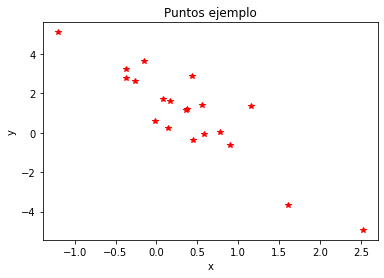

In [25]:
plt.plot(x,y, 'r*')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Puntos ejemplo')
plt.show()

##### El ajuste

Con numpy podemos usar la función `polyfit` en el paquete de `numpy` para realizar el ajuste: (ver [numpy.polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html))

In [26]:
# el tercer argumento de polyfit especifica el grado del polinomio a ajustar. 
#Usaremos ngrado = 1 pues queremos ajustar una recta
ngrado = 1
coeficientes = np.polyfit(x,y,ngrado)

In [27]:
#Una vez realizado el llamado a la función polyfit se regresan los coeficientes de x
#ordenados del mayor grado al menor.
pprint.pprint(coeficientes)

array([-2.65438794,  2.02950714])


Entonces nuestro polinomio es: $$p_{1}(x) = -2.65x + 2.03$$

y así tenemos nuestras beta's ajustadas $\hat{\beta_0} = 2.03$, $\hat{\beta_1} = -2.65$.

##### La gráfica

Ahora nos gustaría graficar el modelo en el intervalo $[min(x),max(x)]$ con $min(x)$ la entrada con valor mínimo del numpy array $x$ y $max(x)$ su entrada con valor máximo.

Para lo anterior debemos obtener los valores ajustados al evaluar $p_1(x)$ los valores de $x$:

In [28]:
y_ajustadas_numpy = coeficientes[1] + coeficientes[0] * x

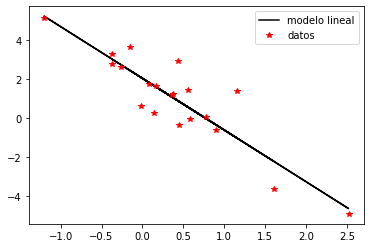

In [29]:
plt.plot(x, y_ajustadas_numpy, 'k-',x, y, 'r*')
plt.legend(['modelo lineal','datos'], loc='best')
plt.show()

##### También podemos obtener las y's ajustadas con la factorización QR:

In [30]:
#construimos a la matriz A:
A=np.ones((mpoints,2))

In [31]:
A[:,1] = x

In [32]:
A

array([[ 1.        , -0.26371806],
       [ 1.        ,  0.08532019],
       [ 1.        ,  0.430007  ],
       [ 1.        ,  0.89506857],
       [ 1.        ,  0.55695552],
       [ 1.        ,  0.44112284],
       [ 1.        ,  0.37538845],
       [ 1.        , -0.1499474 ],
       [ 1.        ,  0.77682473],
       [ 1.        , -0.02254181],
       [ 1.        ,  1.60557773],
       [ 1.        , -0.36735574],
       [ 1.        ,  0.35554203],
       [ 1.        ,  0.16982717],
       [ 1.        ,  2.51802379],
       [ 1.        ,  0.13922515],
       [ 1.        ,  1.15944417],
       [ 1.        ,  0.58720721],
       [ 1.        , -1.20052527],
       [ 1.        , -0.3720616 ]])

In [36]:
Q,R = np.linalg.qr(A)

In [37]:
#Resolvemos el sistema R*beta = Q^T*y
beta = solve_triangular(R,Q.T@y)
pprint.pprint(beta)

array([ 2.02950714, -2.65438794])


In [38]:
y_ajustadas_QR = A@beta
#obsérvese que la línea anterior es equivalente a realizar:
#y_ajustadas_QR = beta[0] + beta[1]*x

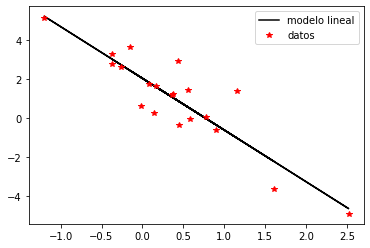

In [39]:
plt.plot(x, y_ajustadas_QR , 'k-',x, y, 'r*')
plt.legend(['modelo lineal','datos'], loc='best')
plt.show()

### Forma 2

Usamos optimización numérica reescribiendo la función objetivo:

$$f_o(\beta)=\displaystyle \sum_{i=1}^{20} (y_i -f(x_i|\beta))^2 = \displaystyle \sum_{i=1}^{20} (y_i - (\beta_0 + \beta_1 x_i))^2 = \displaystyle \sum_{i=1}^{20} (y_i - A[i,:]^T\beta)^2 = ||y - A \beta||_2^2$$

con $y \in \mathbb{R}^{20}, A \in \mathbb{R}^{20 \times 2}, \beta \in \mathbb{R}^{2 \times 1}$ y $A[i,:]$ $i$-ésimo renglón de $A$.

Planteamos el problema de optimización numérica:

$$\displaystyle \min_{\beta \in \mathbb{R}^n} ||y - A\beta||_2^2$$

**¿Solución?**

Reescribimos $f_o$ como $f_o(\beta) = ||y-A\beta||_2^2= (y-A\beta)^T(y-A\beta) = y^Ty-2\beta^TA^Ty + \beta^TA^TA\beta$, observa que esta última expresión es un número $\mathbb{R}$. 

Por lo anterior: $\nabla f_o(\beta) = -2A^Ty + 2A^TA\beta$. $\nabla f_o$ es un vector en $\mathbb{R}^{2 \times 1}$, de hecho sus entradas son $\nabla f_o(\beta) = 
\left [
\begin{array}{c}
\frac{\partial f_o(\beta)}{\beta_0}\\
\frac{\partial f_o(\beta)}{\beta_1}
\end{array}
\right ]
$
. 

Si se plantea la **ecuación no lineal**: $\nabla f_o(\beta)= 0$ obtenemos una forma **cerrada** de la solución que está dada por $A^TA \beta=A^Ty$ (y son las ecuaciones normales!).

**¿Método numérico?**

#### Método por batch o lote vía descenso en gradiente 

La solución como la encontramos en el ejemplo del inicio, es considerar un método iterativo en el que tomamos un punto inicial $\beta^{(0)}$ y las actualizaciones se realizan:

$$\beta^{(k)} = \beta^{(k-1)} - t_{k-1}\nabla f\left(\beta^{(k-1)}\right), k=1,2,\dots$$

y $t_{k-1}$ obtenida por búsqueda de línea con *backtracking* y es una cantidad positiva.

**Obs:** como el óptimo de $-2A^Ty + 2A^TA\beta$ es el mismo que el de $-A^Ty + A^TA\beta$, utilizamos esta última expresión que corresponde a una **función objetivo** $f_o = \frac{1}{2}y^Ty-\beta^TA^Ty + \frac{1}{2}\beta^TA^TA\beta$).

calculamos primero $-A^Ty$:

In [40]:
cte=-np.transpose(A)@y

In [41]:
cte

array([-20.09990114,  23.70269232])

el gradiente de $f_o$: $\nabla f_o(\beta) = -A^Ty + A^TA\beta$:

In [42]:
gf = lambda beta_fun: cte + np.transpose(A)@(A@beta_fun)
    #observa que no hacemos la multiplicación (A^T*A)*beta, mejor hacemos
    #primero A*beta y luego multiplicacmos por A^T

Iniciamos con las iteraciones dadas por la fórmula de actualización tomando $\beta_0=(0,0)^T$:

In [43]:
beta_0 = np.array([0,0])

**Comentario: más adelante veremos cómo obtener las $t_{k-1}$'s de la búsqueda de línea por backtracking**

In [44]:
t_0=.130

In [45]:
beta_1 = beta_0 - t_0*gf(beta_0)

In [46]:
beta_1

array([ 2.61298715, -3.08135   ])

In [47]:
t_1=.0625

In [48]:
beta_2 = beta_1 - t_1*gf(beta_1)

In [49]:
beta_2

array([ 2.08962991, -2.9670693 ])

In [50]:
t_2 = .0625

In [51]:
beta_3 = beta_2 - t_2*gf(beta_2)

In [52]:
beta_3

array([ 2.16533318, -2.70622534])

In [53]:
t_3 = .0625

In [54]:
beta_4 = beta_3 - t_3*gf(beta_3)

In [55]:
beta_4

array([ 2.02056018, -2.7237037 ])

In [56]:
t_4 = .0625

In [57]:
beta_5 = beta_4 - t_4*gf(beta_4)

In [58]:
beta_5

array([ 2.06518606, -2.65513248])

In [59]:
y_ajustadas_gradiente = A@beta_5
#obsérvese que la línea anterior es equivalente a realizar:
#y_ajustadas_gradiente = beta_5[0] + beta_5[1]*x

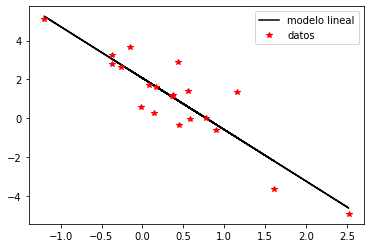

In [60]:
plt.plot(x, y_ajustadas_gradiente , 'k-',x, y, 'r*')
plt.legend(['modelo lineal','datos'], loc='best')
plt.show()

#### Método por batch o lote vía descenso por dirección de Newton

Otra opción es utilizar la información de segundo orden con la Hessiana y considerar una actualización:

$$\beta^{(k)} = \beta^{(k-1)} - \nabla^2 f \left (\beta^{(k-1)} \right )^{-1} \nabla f\left(\beta^{(k-1)} \right)$$

para $k=1,2,\dots,$ (omitiendo la búsqueda de línea por *backtracking*).


In [61]:
beta_1 = beta_0 - np.linalg.solve(np.transpose(A)@A,gf(beta_0))

In [62]:
beta_1

array([ 2.02950714, -2.65438794])

In [63]:
y_ajustadas_Newton = A@beta_1
#obsérvese que la línea anterior es equivalente a realizar:
#y_ajustadas_Newton = beta_1[0] + beta_1[1]*x

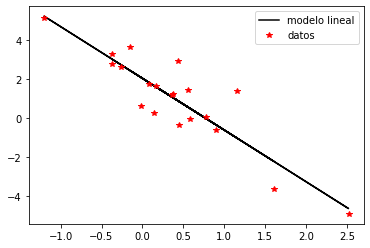

In [64]:
plt.plot(x, y_ajustadas_Newton , 'k-',x, y, 'r*')
plt.legend(['modelo lineal','datos'], loc='best')
plt.show()

**Hasta este punto comparemos con lo obtenido previamente por QR o *polyfit***

Para descenso en gradiente con búsqueda de línea por *backtracking* se tiene un error relativo de:

In [65]:
np.linalg.norm(beta_5-beta)/np.linalg.norm(beta)

0.010680295738530715

Para descenso con dirección de Newton (sin búsqueda de línea por *backtracking*) se tiene un error relativo de::

In [66]:
np.linalg.norm(beta_1-beta)/np.linalg.norm(beta)

1.3290679549401932e-16

**Comentarios:**

* Tenemos alrededor de $2$ dígitos correctos para descenso en gradiente y búsqueda de línea por *backtracking* y máxima precisión con dirección de Newton sin búsqueda de línea por *backtracking*.
* El cálculo anterior lo realizamos por lote o *batch*. 
* El nombre de *batch* o lote se utiliza pues la información de primer o segundo orden es calculada utilizando todos los datos.

#### Método vía gradiente estocástico

Para la formulación del método consideramos a la función objetivo $f_o$ escrita en la forma:

$$f_o(\beta) = \frac{1}{2}\displaystyle \sum_{i=1}^{20} (y_i - A[i,:]^T\beta)^2$$

con $A[i,:]$ $i$-ésimo renglón de $A$ y obsérvese que dividimos por $2$ como antes. Calculamos el gradiente de $f_o$:

$$\nabla f_o (\beta) = -\displaystyle \sum_{i=1}^{20} (y_i - A[i,:]^T\beta)A[i,:]$$

**obs:** La expresión anterior considera $A[i,:] \in \mathbb{R}^{2 \times 1}$, 
$A[i,:]=\left[
\begin{array}{c}
1\\
x_i
\end{array}
\right ]
$  $\forall i=1,\dots, 20$ con $x_i$ dato dado en el ejemplo de mínimos cuadrados lineales.

En el método estocástico utilizando el gradiente (nombrado **descenso en gradiente estocástico**), utilizamos un punto inicial $\beta^{(0)}$ y en lugar de usar la actualización:

$$
\begin{eqnarray}
\beta^{(k)}&=&\beta^{(k-1)} - t_{k-1}\nabla f\left(\beta^{(k-1)}\right) \nonumber\\
&=& \beta^{(k-1)} - t_{k-1}\left(-\displaystyle \sum_{i=1}^{20} (y_i - A[i,:]^T\beta^{(k-1)})A[i,:]\right)\nonumber\\
\end{eqnarray}
$$

para $k=1,2,\dots$ y $t_{k-1}$ cantidad positiva, obtenida por búsqueda de línea con *backtracking*. **Las actualizaciones en descenso en gradiente estocástico son**:

$$
\begin{eqnarray}
\beta^{(k)} &=& \beta^{(k-1)} - \eta_{{k-1}}\nabla f_{i_{k-1}}\left(\beta^{(k-1)}\right) \nonumber\\
\end{eqnarray}
$$

para $k=1,2,\dots$ con $\nabla f_{i_{k-1}}(\cdot)$ el gradiente calculado a partir de una **muestra extraída del conjunto de índices de los renglones: $\{1,2,\dots,n\}$**. 


**Comentarios:**

* La cantidad $\eta_{k-1}$ en este contexto se le nombra **tasa de aprendizaje** y al igual que en el método de descenso en gradiente es una cantidad positiva.

* La muestra de índices para calcular $\nabla f_{i_{k-1}}(\cdot)$ puede contener uno o más índices. Si contiene un único índice por ejemplo $i_{k-1} = \{i\}$ con $i=1,\cdots, n$ se tiene una actualización de la forma:


$$
\begin{eqnarray}
\beta^{(k)} &=& \beta^{(k-1)} - \eta_{{k-1}}\nabla f_{i_{k-1}}\left(\beta^{(k-1)}\right) \nonumber\\
&=& \beta^{(k-1)} - \eta_{k-1}(-(y_i - A[i,:]^T\beta^{(k-1)})A[i,:]) \nonumber \\
&=& \beta^{(k-1)} + \eta_{k-1}(y_i - A[i,:]^T\beta^{(k-1)})A[i,:] \nonumber
\end{eqnarray}
$$

Para el ejemplo numérico de mínimos cuadrados lineales, iniciamos con las iteraciones dadas por la fórmula de actualización tomando $\beta_0=(0,0)^T$ y $\eta_{k-1} = 0.1 \forall k=1,2,\dots$:

In [67]:
beta_0 = np.array([0,0])
eta_0 = .1

Elegimos un índice de los renglones de $A$ de forma pseudoaleatoria y hacemos la actualización:

In [68]:
np.random.seed(1989) #para reproducibilidad
i = np.random.randint(mpoints, size=1)

In [69]:
beta_1 = beta_0 + eta_0*(y[i]-A[i,:].dot(beta_0))*A[i,:]

In [70]:
beta_1

array([[-0.36687934, -0.5890533 ]])

El **algoritmo** es:

* Repetir el siguiente bloque para $k=1,2,\dots$ hasta convergencia:

    * Extraer una muestra aleatoria $i_{k-1}$ del conjunto de índices de los renglones de $A$: $\{1,2,\dots,n\}$.
    * Calcular la tasa de aprendizaje $\eta_{k-1}$ (positiva).
    * Calcular la actualización $\beta^{(k)} = \beta^{(k-1)} + \eta_{k-1}\nabla f_{i_{k-1}}\left(\beta^{(k-1)}\right)$ 



Midamos el error relativo con este algoritmo utilizando **sólo un índice** extraído al azar del conjunto de índices de renglones de $A$ para el ejemplo de mínimos cuadrados lineales: $\beta^{(k)} = \beta^{(k-1)} + \eta_{k-1}(y_i - A[i,:]^T\beta^{(k)})A[i,:]$

In [72]:
def error_relativo(aprox, obj):
    return np.linalg.norm(aprox-obj)/np.linalg.norm(obj)

Definamos puntos iniciales

In [73]:
maxiter=5
tol=1e-2
err=error_relativo(beta_0,beta)
beta_k = beta_0
k=1
eta_k = .1 #constante para todas las iteraciones

In [74]:
err

1.0

In [75]:
while(err>tol and k <= maxiter):
    i = int(np.random.randint(mpoints, size=1))
    beta_k = beta_k+eta_k*(y[i]-A[i,:].dot(beta_k))*A[i,:]
    k+=1
    eta_k=.1
    err=error_relativo(beta_k,beta)

In [76]:
err

0.9235855479140276

tenemos un error relativo de $92\%$ con $5$ iteraciones.

In [77]:
beta_k

array([0.50527765, 0.02895074])

Consideremos una **muestra más grande** de índices para calcular $\nabla f_{i_{k-1}}(\cdot)$ de modo que las actualizaciones ahora son de la forma:

$$
\begin{eqnarray}
\beta^{(k)} &=& \beta^{(k-1)} - \eta_{{k-1}}\nabla f_{i_{k-1}}\left(\beta^{(k-1)}\right) \nonumber\\
&=& \beta^{(k-1)} - \eta_{k-1}\displaystyle \sum_{i \in i_{k-1}} (-(y_i - A[i,:]^T\beta^{(k)})A[i,:]) \nonumber\\
&=& \beta^{(k-1)} + \eta_{k-1}\displaystyle \sum_{i \in i_{k-1}}(y_i - A[i,:]^T\beta^{(k)})A[i,:] \nonumber\\
\end{eqnarray}
$$

para $k=1,2,\dots$ e $i_{k-1}$ una muestra de índices extraída de forma aleatoria de los índices de los renglones de $A$.


Usamos $4$ iteraciones con una muestra de índices de tamaño $5$. Puntos iniciales:

In [78]:
maxiter=4
tol=1e-2
err=error_relativo(beta_0,beta)
beta_k = beta_0
k=1
eta_k = .1 #constante para todas las iteraciones
m_sample = 5

In [79]:
err

1.0

In [80]:
while(err>tol and k <= maxiter):
    idx = np.random.choice(mpoints, m_sample,replace=False) #muestra de tamaño m_sample sin reemplazo
    beta_k = beta_k+eta_k*(y[idx]-A[idx,:]@beta_0)@A[idx,:]
    k+=1
    eta_k=.1
    err=error_relativo(beta_k,beta)

In [81]:
err

0.5166377257028253

Obsérvese que tenemos un error relativo de $51\%$ con $4$ iteraciones, una muestra de tamaño $5$ y es menor al que se obtuvo con una muestra de tamaño 1 de índices.

In [83]:
beta_k

array([ 1.21121877, -4.1743939 ])

**Comentarios:**  Algunos comentarios generales para el enfoque por *batch* o lote y el estocástico que podemos realizar son:

* El enfoque por *batch*:

    * Busca **direcciones de descenso** en cada iteración vía las actualizaciones de $\{\beta_{k}\}$ hasta convergencia del mínimo de la función objetivo $f_o$. 
    * Por el punto anterior, la velocidad de convergencia de los métodos iterativos por *batch* oscila entre lineal, superlineal y cuadrática para ejemplos reales pero es **muy dependiente de la cantidad de datos** que se utilicen.
    * La convergencia depende del punto inicial y de las cantidades positivas $t_{k-1}$.
    * El cómputo de las direcciones de descenso utilizan toda la información disponible en cada iteración.
    * Por la definición de sus actualizaciones, el cómputo de las direcciones de descenso se puede realizar con **cómputo en paralelo**.


* El enfoque estocástico:

    * Genera $\beta_{k}$'s cuyo comportamiento está determinado por la secuencia aleatoria $\{i_{k-1}\}$. De hecho $\{\beta_{k}\}$ es un [proceso estocástico](https://en.wikipedia.org/wiki/Stochastic_process). 
    * Además del punto anterior, su convergencia depende de la taza de aprendizaje $\eta_{k-1}$. 
    * En el contexto de grandes cantidades de datos la **convergencia es independiente del tamaño de los datos**: si aumentamos más cantidad de datos, su velocidad de convergencia es independiente de esto.
    * No necesariamente se obtienen direcciones de descenso con este método. Si en **promedio o en esperanza matemática** se calculan direcciones de descenso con las actualizaciones de $\{\beta_k\}$, entonces la secuencia $\{\beta_{k}\}$ puede guiarse hacia el mínimo de la función objetivo $f_o$.
    * Por el punto anterior, en iteraciones iniciales podemos tener un gran avance hacia el mínimo pero en iteraciones no iniciales puede quedarse el método oscilando en una región cercana al mínimo (como una canica en un tazón).
    * Es un método más complicado de implementar con cómputo en paralelo que la versión *batch*.
    * No utilizamos en cada iteración todos los datos disponibles.

* Por el error relativo obtenido en el ejemplo anterior parecería que el método estocástico de descenso en gradiente no es una opción fuerte para problemas de optimización. Y esto para problemas de tamaño chico o mediano es cierto pero para grandes cantidades de datos hay razones prácticas, teóricas e intituitivas\* que posicionan a este método por encima de formulaciones en *batch*. 

\*Una razón intuitiva del por qué el método estocástico de descenso en gradiente podría ganarle en velocidad a una formulación en *batch* es la siguiente: supóngase que un **conjunto de entrenamiento** $\mathcal{S}$ consistiera de renglones redundantes. Imaginemos que $\mathcal{S}$ consta de $10$ repeticiones de un conjunto más pequeño $\mathcal{S}_\text{sub}$. Entonces ejecutar un método *batch* sería $10$ veces más costoso que si solamente tuviéramos una única copia de $\mathcal{S}_\text{sub}$. El método estocástico de descenso en gradiente tendría el mismo costo en cualquiera de los dos escenarios ($10$ copias vs $1$ copia) pues elige con misma probabilidad renglones del conjunto $\mathcal{S}_\text{sub}$. En la realidad un conjunto de entrenamiento no contiene duplicados exactos de la información pero en muchas aplicaciones *large-scale* existe (de forma aproximada) información redundante.


## ¿Optimización numérica convexa?

Aplicaciones de *machine learning* conducen al planteamiento de problemas de optimización convexa y no convexa. 

Ejemplo de **problemas convexos** los encontramos en la aplicación de clasificación de textos en donde se desea asignar un texto a clases definidas de acuerdo a su contenido (p.ej. determinar si un docu de texto es sobre política). La aplicación anterior puede formularse utilizando **funciones de pérdida convexas**.

Como ejemplos de aplicaciones en el ámbito de la **optimización no convexa** están el reconocimiento de voz y reconocimiento de imágenes. El uso de [redes neuronales](https://en.wikipedia.org/wiki/Artificial_neural_network) [profundas](https://en.wikipedia.org/wiki/Deep_learning)\* ha tenido muy buen desempeño en tales aplicaciones haciendo uso de cómputo en la GPU, ver [2.3.CUDA](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/II.computo_paralelo/2.3.CUDA.ipynb), [ImageNet Classification with Deep Convolutional Neural Networks](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf), [2012: A Breakthrough Year for Deep Learning](https://medium.com/limitlessai/2012-a-breakthrough-year-for-deep-learning-2a31a6796e73). En este caso se utilizan **funciones objetivo no lineales y no convexas**.

\*Los tipos de redes neuronales profundas, *deep neural networks*, que han sido mayormente usadas en el inicio del siglo XXI son las mismas que las que eran populares en los años $90$'s. El éxito de éstos tipos y su uso primordialmente se debe a la disponibilidad de *larger datasets* y mayores recursos computacionales.

Desde los $40$'s se han desarrollado algoritmos para resolver problemas de optimización, se han analizado sus propiedades y se han desarrollado buenas implementaciones de software.  Sin embargo, una clase de problemas de optimización en los que encontramos métodos **efectivos** son los convexos. 

**En el módulo IV del curso nos enfocamos mayormente a métodos numéricos para resolver problemas convexos principalmente por lo anterior y porque métodos para optimización no convexa utilizan parte de la teoría de convexidad desarrollada en optimización convexa. Además un buen número de problemas de aprendizaje utilizan funciones de pérdida convexas**.


---

# Tablita útil para fórmulas de diferenciación con el operador $\nabla$

Si $f,g:\mathbb{R}^n \rightarrow \mathbb{R}$ son diferenciables y $\alpha_1, \alpha_2 \in \mathbb{R}$, $A \in \mathbb{R}^{n \times n}$, $b \in \mathbb{R}^n$ son fijas. Diferenciando con respecto a la variable $x \in \mathbb{R}^n$ se tiene:

| | |
|:--:|:--:|
|linealidad | $\nabla(\alpha_1 f(x) + \alpha_2 g(x)) = \alpha_1 \nabla f(x) + \alpha_2 \nabla g(x)$|
|producto | $\nabla(f(x)g(x)) = \nabla f(x) g(x) + f(x) \nabla g(x)$|
|producto punto|$\nabla(b^Tx) = b$ 
|cuadrático|$\nabla(x^TAx) = 2(A+A^T)x$|

# Definiciones utilizadas en el curso (algunas de ellas...)

En lo que continúa se considera $f_0 = f_o$ (el subíndice "0" y el subíndice "o" son iguales)

# Problema estándar de optimización

$$\displaystyle \min_{x \in \mathbb{R}^n} f_o(x)$$

$$\text{sujeto a:}$$

$$f_i(x) \leq 0, \quad \forall i=1,\dots,m$$

$$h_i(x) = 0, \quad \forall i=1,\dots,p$$

con $f_i: \mathbb{R}^n \rightarrow \mathbb{R}$ $\forall i=0,\dots,m$, $h_i: \mathbb{R}^n \rightarrow \mathbb{R}$, $\forall i=1,\dots,p$. $f_i$ son las **restricciones de desigualdad**, $h_i$ son las **restricciones de igualdad**.

## Dominio del problema de optimización

El conjunto de puntos para los que la función objetivo y las funciones de restricción $f_i, h_i$ están definidas se nombra **dominio del problema de optimización**, esto es:

$$\mathcal{D} = \bigcap_{i=0}^m\text{dom}f_i \cap \bigcap_{i=1}^p\text{dom}h_i$$

(en github aparecen los símbolos de intersección más abajo de lo que deberían aparecer...abriendo con jupyter el notebook esto no pasa...)

**Comentarios:**

* Un punto $x \in \mathcal{D}$ se nombra **factible** si satisface las restricciones de igualdad y desigualdad. El conjunto de puntos factibles se nombra **conjunto de factibilidad**.

* El problema anterior se nombra factible si existe **al menos un punto factible**, si no se cumple lo anterior entonces es infactible.


## Óptimo del problema de optimización

El valor óptimo del problema se denota como $p^*$. En notación matemática es:

$$p^* = \inf\{f_o(x) | f_i(x) \leq 0, \forall i=1,\dots,m, h_i(x) = 0 \forall i=1,\dots,p\}$$

**Comentarios:**

* Si el problema es **infactible** entonces $p^* = \infty$.

* Si $\exists x_k$ factible tal que $f_o(x_k) \rightarrow -\infty$ para $k \rightarrow \infty$ entonces $p^*=-\infty$ y se nombra **problema de optimización no acotado por debajo**.

## Punto óptimo del problema de optimización

$x^*$ es **punto óptimo** si es factible y $f_o(x^*) = p^*$. El conjunto de óptimos se nombra **conjunto óptimo** y se denota:

$$X_{\text{opt}} = \{x | f_i(x) \leq 0 \forall i=1,\dots,m, h_i(x) =0 \forall i=1,\dots,p, f_o(x) = p^*\}$$

**Comentarios:**

* Si existe un punto óptimo se dice que el valor óptimo se alcanza y por tanto el problema de optimización tiene solución, es *solvable*.

* Si $X_{\text{opt}} = \emptyset$ se dice que el valor óptimo no se alcanza. Obsérvese que para problemas no acotados nunca se alcanza el valor óptimo.

* Si $x$ es factible y $f_o(x) \leq p^* + \epsilon$ con $\epsilon >0$, $x$ se nombra **$\epsilon$-subóptimo** y el conjunto de puntos $\epsilon$-subóptimos se nombra **conjunto $\epsilon$-subóptimo**.

## Óptimo local

Un punto factible se nombra óptimo local si $\exists R > 0$ tal que:

$$f_o(x) = \inf \{f_o(z) | f_i(z) \leq 0 \forall i=1,\dots,m, h_i(z) = 0 \forall i=1,\dots, p, ||z-x||_2 \leq R\}.$$

Así, $x$ resuelve:

$$\displaystyle \min_{z \in \mathbb{R}^n} f_o(z)$$

$$\text{sujeto a:}$$

$$f_i(z) \leq 0, \forall i =1,\dots,m$$

$$h_i(z) =0, \forall i=1,\dots,p$$

$$||z-x||_2 \leq R$$

**Obs:** la palabra **óptimo** se utiliza para **óptimo global**.

## Restricciones activas, no activas y redundantes

Si $x$ es factible y $f_i(x)=0$ entonces la restricción de desigualdad $f_i(x) \leq 0$ se nombra **restricción activa en $x$**. Se nombra **inactiva en $x$** si $f_i(x) <0$ para alguna $i$.

**Comentario:** Las restricciones de igualdad, $h_i(x)$, siempre son activas en el conjunto factible. 


Una restricción se nombra **restricción redundante** si al quitarla el conjunto factible no se modifica.

## Problemas de optimización convexa en su forma estándar o canónica

$$\displaystyle \min_{x \in \mathbb{R}^n} f_o(x)$$

$$\text{sujeto a:}$$

$$f_i(x) \leq 0 , i=1,\dots,m$$

$$h_i(x)=0, i=1,\dots,p$$

donde: $f_i$ son **convexas** $\forall i=0,2,\dots,m$ y $h_i$ $\forall i =1,\dots,p$ son **funciones afín**\*. 

\*Una función afín es de la forma $h(x) = Ax+b$ con $A \in \mathbb{R}^{m \times n}$ y $b \in \mathbb{R}^m$. En la definición anterior $h_i(x) = a_i^Tx-b_i$ con $a_i \in \mathbb{R}^n$, $b \in \mathbb{R}$ $\forall i=1,\dots,p$ y geométricamente $h_i(x)$ es un **hiperplano** en $\mathbb{R}^n$.

**Comentarios:** Lo siguiente se puede verificar con propiedades teóricas:

* El conjunto de factibilidad de un problema de optimización convexa es un conjunto convexo. Esto se puede ver pues es una intersección finita de conjuntos convexos: intersección entre las $x$'s que satisfacen $f_i(x) \leq 0$, que se nombra **conjunto subnivel**\*, y las $x$'s que están en un hiperplano.

\*Un conjunto $\alpha$-subnivel es de la forma $\{x \in \text{dom}f | f(x) \leq \alpha\}$. Si $f$ es convexa el conjunto subnivel es un conjunto convexo.

* El conjunto óptimo y los conjuntos $\epsilon$-subóptimos son convexos.

* Si la función objetivo $f_o$ es **fuertemente convexa** entonces el conjunto óptimo contiene a lo más un punto.

* Si en el problema anterior se tiene que **maximizar** una $f_o$ función objetivo **cóncava** y se tienen misma forma estándar y $f_i$ convexa, $h_i$ afín entonces también se nombra al problema como **problema de optimización convexa**. Todos los resultados, conclusiones y algoritmos desarrollados para los problemas de minimización son aplicables para maximización. En este caso se puede resolver un problema de maximización al minimizar la función objetivo  $-f_o$ que es convexa.

# Función convexa

Sea $f:\mathbb{R}^n \rightarrow \mathbb{R}$ una función con el conjunto $\text{dom}f$ convexo. $f$ se nombra convexa  (en su $\text{dom}f$) si $\forall x,y \in \text{dom}f$ y $\theta \in [0,1]$ se cumple:

$$f(\theta x + (1-\theta) y) \leq \theta f(x) + (1-\theta)f(y).$$


**Comentarios:**

* $\text{dom}f$ es convexo $\therefore$ $\theta x + (1-\theta)y \in \text{dom}f$

* La convexidad de $f$ se define para $\text{dom}f$ aunque para casos en particular se detalla el conjunto en el que $f$ es convexa.

* Si la desigualdad se cumple de forma estricta $\forall x \neq y$ $f$ se nombra **estrictamente convexa**.

* $f$ es **cóncava** si $-f$ es convexa y **estrictamente cóncava** si $-f$ es estrictamente convexa. Otra forma de definir concavidad es con una desigualdad del tipo:

$$f(\theta x + (1-\theta) y) \geq \theta f(x) + (1-\theta)f(y).$$

y mismas definiciones para $x,y, \theta$ que en la definición de convexidad.


* Si $f$ es convexa, geométricamente el segmento de línea que se forma con los puntos $(x,f(x)), (y,f(y))$ está por encima o es igual a $f(\theta x + (1-\theta)y) \forall \theta \in [0,1]$ y $\forall x,y \in \text{dom}f$:

<img src="https://dl.dropboxusercontent.com/s/fdcx1k150nfwykv/draw_convexity_for_functions.png?dl=0" heigth="300" width="300">

* La desigualdad que define a funciones convexas se nombra **desigualdad de Jensen**.

# Conjunto convexo

## Línea y segmentos de línea

Sean $x_1, x_2 \in \mathbb{R}^n$ con $x_1 \neq x_2$. Entonces el punto:

$$y = \theta x_1 + (1-\theta)x_2$$

con $\theta \in \mathbb{R}$ se encuentra en la línea que pasa por $x_1$ y $x_2$. $\theta$ se le nombra parámetro y si $\theta \in [0,1]$ tenemos un segmento de línea:

<img src="https://dl.dropboxusercontent.com/s/dldljf5igy8xt9d/segmento_linea.png?dl=0" heigth="200" width="200">


**Comentarios:** 

* $y = \theta x_1 + (1-\theta)x_2 = x_2 + \theta(x_1 -x_2)$ y esta última igualdad se interpreta como "$y$ es la suma del punto base $x_2$ y la dirección $x_1-x_2$ escalada por $\theta$". 

* Si $\theta=0$ entonces $y=x_2$. Si $\theta \in [0,1]$ entonces $y$ se "mueve" en la dirección $x_1-x_2$ hacia $x_1$ y si $\theta>1$ entonces $y$ se encuentra en la línea "más allá" de $x_1$:

<img src="https://dl.dropboxusercontent.com/s/nbahrio7p1mj4hs/segmento_linea_2.png?dl=0" heigth="350" width="350">


El punto enmedio entre $x_1$ y $x_2$ tiene $\theta=\frac{1}{2}$.

## Conjunto convexo

Un conjunto $\mathcal{C}$ es convexo si el segmento de línea entre cualquier par de puntos de $\mathcal{C}$ está completamente contenida en $\mathcal{C}$. Esto se escribe matemáticamente como:

$$\theta x_1 + (1-\theta) x_2 \in \mathcal{C} \forall \theta \in [0,1], \forall x_1, x_2 \in \mathcal{C}.$$

Ejemplos gráficos de conjuntos convexos:

<img src="https://dl.dropboxusercontent.com/s/gj54ism1lqojot6/ej_conj_convexos.png?dl=0" heigth="400" width="400">

Ejemplos gráficos de conjuntos no convexos:

<img src="https://dl.dropboxusercontent.com/s/k37zh5v3iq3kx04/ej_conj_no_convexos.png?dl=0" heigth="350" width="350">

**Comentarios:** 


* El punto $\displaystyle \sum_{i=1}^k \theta_i x_i$ con $\displaystyle \sum_{i=1}^k \theta_i=1$, $\theta_i \geq 0 \forall i=1,\dots,k$ se nombra **combinación convexa** de los puntos $x_1, x_2, \dots, x_k$. Una combinación convexa de los puntos $x_1, \dots, x_k$ puede pensarse como una mezcla o promedio ponderado de los puntos, con $\theta_i$ la fracción $\theta_i$ de $x_i$ en la mezcla.

* Un conjunto es convexo si y sólo si contiene cualquier combinación convexa de sus puntos.

# Ejemplos de funciones convexas y cóncavas

* Una función afín es convexa y cóncava en todo su dominio: $f(x) = Ax+b$ con $A \in \mathbb{R}^{m \times n}, b \in \mathbb{R}^n$, $\text{dom}f = \mathbb{R}^n$.


**Obs:** por tanto las funciones lineales también son convexas y cóncavas.

* Funciones cuadráticas: $f: \mathbb{R}^n \rightarrow \mathbb{R}$, $f(x) = \frac{1}{2} x^TPx + q^Tx + r$ son convexas en su dominio: $\mathbb{R}^n$. $P \in \mathcal{S}_+^n, q \in \mathbb{R}^n, r \in \mathbb{R}$ con $\mathbb{S}_+^n$ conjunto de **matrices simétricas positivas semidefinidas**\*.

\*Una matriz $A$ es positiva semidefinida si $x^TAx \geq 0$ $\forall x \in \mathbb{R}^n - \{0\}$. Si se cumple de forma estricta la desigualdad anterior entonces $A$ es **positiva definida**. Con los eigenvalores podemos caracterizar a las matrices definidas y semidefinidas positivas: $A$ es semidefinida positiva si y sólo si los eigenvalores de $T=\frac{A+A^T}{2}$ son no negativos. Es definida positiva si y sólo si los eigenvalores de $T$ son positivos. Los conjuntos de matrices que se utilizan para definir a matrices semidefinidas positivas y definidas positivas son $\mathbb{S}_{+}^n$ y $\mathbb{S}_{++}^n$ respectivamente.

**Obs:** $f$ es estrictamente convexa si y sólo si $P \in \mathbb{S}_{++}^n$. $f$ es cóncava si y sólo si $P \in -\mathbb{S}_+^n$.

* Exponenciales: $f: \mathbb{R} \rightarrow \mathbb{R}$, $f(x) = e^{ax}$ para cualquier $a \in \mathbb{R}$ es convexa en su dominio: $\mathbb{R}$.

* Potencias: $f: \mathbb{R} \rightarrow \mathbb{R}$, $f(x)=x^a$:

    * Si $a \geq 1$ o $a \leq 0$ entonces $f$ es convexa en $\mathbb{R}_{++}$ (números reales positivos).
    * Si $0 \leq a \leq 1$ entonces $f$ es cóncava en $\mathbb{R}_{++}$.

* Potencias del valor absoluto: $f: \mathbb{R} \rightarrow \mathbb{R}$, $f(x)=|x|^p$ con $p \geq 1$ es convexa en $\mathbb{R}$.

* Logaritmo: $f: \mathbb{R} \rightarrow \mathbb{R}$, $f(x) = \log(x)$ es cóncava en su dominio: $\mathbb{R}_{++}$.

* Entropía negativa: $f(x) = \begin{cases}
x\log(x) &\text{ si } x > 0 ,\\
0 &\text{ si } x = 0
\end{cases}$ es estrictamente convexa en su dominio: $\mathbb{R}_+$.

* Normas: cualquier norma definida es convexa en sus dominios.

* Función máximo: $f: \mathbb{R}^{n} \rightarrow \mathbb{R}$, $f(x) = \max\{x_1,\dots,x_n\}$ es convexa.

* Función log-sum-exp: $f: \mathbb{R}^{n} \rightarrow \mathbb{R}$, $f(x)=\log\left(\displaystyle \sum_{i=1}^ne^{x_i}\right)$ es convexa en su dominio: $\mathbb{R}^n$.

* La media geométrica: $f: \mathbb{R}^{n} \rightarrow \mathbb{R}$, $f(x) = \left(\displaystyle \prod_{i=1}^n x_i \right)^\frac{1}{n}$ es cóncava en su dominio: $\mathbb{R}_{++}^n$.

* Función log-determinante: $f: \mathbb{S}^{n} \rightarrow \mathbb{R}^n$, $f(x) = \log(\det(X))$ es cóncava en su dominio: $\mathbb{S}_{++}^n$.

# Resultados útiles de teoría de convexidad


**Sobre funciones convexas/cóncavas**


* Sea $f: \mathbb{R}^n \rightarrow \mathbb{R}$ diferenciable entonces $f$ es convexa si y sólo si $\text{dom}f$ es un conjunto convexo y se cumple:

$$f(y) \geq f(x) + \nabla f(x)^T(y-x) \forall x,y \in \text{dom}f.$$

Si se cumple de forma estricta la desigualdad $f$ se nombra estrictamente convexa. También si su $\text{dom}f$ es convexo y se tiene la desigualdad en la otra dirección "$\leq$" entonces $f$ es cóncava.

Geométricamente este resultado se ve como sigue para $\nabla f(x) \neq 0$:

<img src="https://dl.dropboxusercontent.com/s/e581e22xeejdwu0/convexidad_con_hiperplano_de_soporte.png?dl=0" heigth="350" width="350">


y el hiperplano $f(x) + \nabla f(x)^T(y-x)$ se nombra **hiperplano de soporte para la función $f$ en el punto $(x,f(x))$**. Obsérvese que si $\nabla f(x)=0$ se tiene $f(y) \geq f(x) \forall y \in \text{dom}f$ y por lo tanto $x$ es un mínimo global de $f$. 

* Una función es convexa si y sólo si es convexa al restringirla a cualquier línea que intersecte su dominio, esto es, si $g(t) = f(x + tv)$ es convexa $\forall x,v \in \mathbb{R}^n$, $\forall t \in \mathbb{R}$ talque $x + tv \in \text{dom}f$

* Sea $f: \mathbb{R}^n \rightarrow \mathbb{R}$ dos veces diferenciable, entonces $f$ es convexa en $\text{dom}f$ si y sólo si $\text{dom}f$ es convexo y $\nabla^2f(x)$ es semidefinida positiva. Si $\nabla^2f(x)$ es definida positiva y $\text{dom}f$ es convexo entonces $f$ es estrictamente convexa en $\text{dom}f$ (el recíproco no es verdadero).



**Sobre problemas de optimización**

* Si $f$ es diferenciable y $x^*$ es óptimo entonces $\nabla f(x^*) = 0$.

* Si $f$ es dos veces diferenciable y $x^*$ es mínimo entonces $\nabla^2 f(x^*)$ es una matriz semidefinida positiva.

* Si $\nabla f(x^*)=0$ y $\nabla^2f(x^*)$ es una matriz definida positiva entonces $x^*$ es mínimo local.

* Una propiedad fundamental de un óptimo local en un problema de optimización convexa es que también es un óptimo global.

* Si $f_o$ en un problema de optimización convexa es diferenciable y $X$ es el conjunto de factibilidad entonces $x$ es óptimo si y sólo si $x \in X$ y $\nabla f_o(x)^T(y-x) \geq 0$ $\forall y \in X$. Esta propiedad se reduce a la condición: $x$ es óptimo si y sólo si $\nabla f_o(x) = 0$.

Geométricamente el resultado anterior se visualiza para $\nabla f(x) \neq 0$ y $-\nabla f(x)$ apuntando hacia la dirección dibujada:

<img src="https://dl.dropboxusercontent.com/s/0tmpivvo5ob4oox/optimo_convexidad_con_hiperplano_de_soporte.png?dl=0" heigth="550" width="550">


**Comentario:** Por los resultados anteriores los métodos de optimización que revisaremos en el módulo IV buscarán resolver la **ecuación no lineal** $\nabla f_o(x)=0$. Dependiendo del número de soluciones de la ecuación $\nabla f_o(x)=0$ se tienen situaciones distintas. Por ejemplo, si no tiene solución entonces el/los óptimos no se alcanza(n) pues el problema puede no ser acotado por debajo o si existe el óptimo éste puede no alcanzarse. Por otro lado, si la ecuación tiene múltiples soluciones entonces cada solución es un mínimo de $f_o$.

**Referencias:**

* S. P. Boyd, L. Vandenberghe, Convex Optimization, Cambridge University Press, 2009.

* L. Bottou, F. E. Curtis, J Nocedal, Optimization Methods for Large-Scale Machine Learning, SIAM, 2018.